In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [4]:
#import citipy
from citipy import citipy

In [5]:
# creat a list for holding the cities
cities = []
# indentify the nearest cit for each lats and lngs combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if th ecity is unique, add it to cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count
len(cities)

591

In [6]:
import requests
from config import weather_api_key

In [7]:
from datetime import datetime

In [8]:
url="http://api.openweathermap.org/data/2.5/weather?UNITS=Imperial&APPID="+weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?UNITS=Imperial&APPID=7ba8603d042cbbff2ce5028700661739'

In [9]:
boston_url= url + "&q="+"Boston"
print(boston_url)

http://api.openweathermap.org/data/2.5/weather?UNITS=Imperial&APPID=7ba8603d042cbbff2ce5028700661739&q=Boston


In [10]:
boston_weather=requests.get(boston_url).json()
boston_weather

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 283.25,
  'feels_like': 281.62,
  'temp_min': 281.45,
  'temp_max': 285.41,
  'pressure': 1020,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 4.02, 'deg': 348, 'gust': 7.15},
 'clouds': {'all': 20},
 'dt': 1635088503,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635073671,
  'sunset': 1635112120},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an empty list to hold the weather data
city_data = []

# Print the begining of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list (using enumerate()).
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count=1
        
    # Create endpoint URL with eah city
    city_url = url + "&q="+city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 1 | barrow
Processing Record 2 of Set 1 1 | haibowan
City not found. Skipping...
Processing Record 3 of Set 1 1 | chokurdakh
Processing Record 4 of Set 1 1 | sitka
Processing Record 5 of Set 1 1 | jamestown
Processing Record 6 of Set 1 1 | yellowknife
Processing Record 7 of Set 1 1 | cape town
Processing Record 8 of Set 1 1 | akalkot
Processing Record 9 of Set 1 1 | chara
Processing Record 10 of Set 1 1 | dodola
Processing Record 11 of Set 1 1 | quixada
Processing Record 12 of Set 1 1 | punta arenas
Processing Record 13 of Set 1 1 | avera
Processing Record 14 of Set 1 1 | ulladulla
Processing Record 15 of Set 1 1 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 1 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 1 | lalmohan
Processing Record 18 of Set 1 1 | porto novo
Processing Record 19 of Set 1 1 | komsomolskiy
Processing Record 20 of Set 1 1 | kapaa
Pr

Processing Record 30 of Set 4 4 | georgetown
Processing Record 31 of Set 4 4 | langxiang
Processing Record 32 of Set 4 4 | gornozavodsk
Processing Record 33 of Set 4 4 | muramvya
Processing Record 34 of Set 4 4 | monte alegre
Processing Record 35 of Set 4 4 | robertsport
Processing Record 36 of Set 4 4 | reading
Processing Record 37 of Set 4 4 | saleaula
City not found. Skipping...
Processing Record 38 of Set 4 4 | saint-augustin
Processing Record 39 of Set 4 4 | tutoia
Processing Record 40 of Set 4 4 | sayyan
Processing Record 41 of Set 4 4 | tasiilaq
Processing Record 42 of Set 4 4 | zhangjiakou
Processing Record 43 of Set 4 4 | kaitangata
Processing Record 44 of Set 4 4 | isangel
Processing Record 45 of Set 4 4 | kununurra
Processing Record 46 of Set 4 4 | cidreira
Processing Record 47 of Set 4 4 | kaeo
Processing Record 48 of Set 4 4 | belmonte
Processing Record 49 of Set 4 4 | dikson
Processing Record 50 of Set 4 4 | pontiac
Processing Record 1 of Set 5 5 | burica
City not found. 

Processing Record 11 of Set 8 8 | presidencia roque saenz pena
Processing Record 12 of Set 8 8 | bolekhiv
Processing Record 13 of Set 8 8 | kuche
City not found. Skipping...
Processing Record 14 of Set 8 8 | salalah
Processing Record 15 of Set 8 8 | shache
Processing Record 16 of Set 8 8 | nanortalik
Processing Record 17 of Set 8 8 | sao filipe
Processing Record 18 of Set 8 8 | vardo
Processing Record 19 of Set 8 8 | vao
Processing Record 20 of Set 8 8 | benghazi
Processing Record 21 of Set 8 8 | achacachi
Processing Record 22 of Set 8 8 | zaragoza
Processing Record 23 of Set 8 8 | longyearbyen
Processing Record 24 of Set 8 8 | constitucion
Processing Record 25 of Set 8 8 | xintai
Processing Record 26 of Set 8 8 | monaghan
Processing Record 27 of Set 8 8 | flinders
Processing Record 28 of Set 8 8 | piet retief
Processing Record 29 of Set 8 8 | imbituba
Processing Record 30 of Set 8 8 | bathsheba
Processing Record 31 of Set 8 8 | bandarbeyla
Processing Record 32 of Set 8 8 | ken caryl
P

Processing Record 41 of Set 11 11 | kawalu
Processing Record 42 of Set 11 11 | sinnamary
Processing Record 43 of Set 11 11 | lata
Processing Record 44 of Set 11 11 | dir
Processing Record 45 of Set 11 11 | lubumbashi
Processing Record 46 of Set 11 11 | valparaiso
Processing Record 47 of Set 11 11 | ust-kulom
Processing Record 48 of Set 11 11 | auriflama
Processing Record 49 of Set 11 11 | belyy yar
Processing Record 50 of Set 11 11 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 12 12 | sisimiut
Processing Record 2 of Set 12 12 | itoman
Processing Record 3 of Set 12 12 | kaliua
Processing Record 4 of Set 12 12 | buta
Processing Record 5 of Set 12 12 | ojinaga
Processing Record 6 of Set 12 12 | tevriz
Processing Record 7 of Set 12 12 | lolua
City not found. Skipping...
Processing Record 8 of Set 12 12 | kirakira
Processing Record 9 of Set 12 12 | linxia
Processing Record 10 of Set 12 12 | general roca
Processing Record 11 of Set 12 12 | bela
Processing Record 12 of

In [20]:
len(city_data)

543

In [21]:
city_data

[{'City': 'Barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': 271.16,
  'Humidity': 74,
  'Cloudiness': 90,
  'Wind Speed': 3.09,
  'Country': 'US',
  'Date': '2021-10-24 15:19:48'},
 {'City': 'Chokurdakh',
  'Lat': 70.6333,
  'Lng': 147.9167,
  'Max Temp': 248,
  'Humidity': 100,
  'Cloudiness': 97,
  'Wind Speed': 1.48,
  'Country': 'RU',
  'Date': '2021-10-24 15:19:48'},
 {'City': 'Sitka',
  'Lat': 57.0531,
  'Lng': -135.33,
  'Max Temp': 279.09,
  'Humidity': 75,
  'Cloudiness': 20,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': '2021-10-24 15:19:49'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 282.99,
  'Humidity': 93,
  'Cloudiness': 90,
  'Wind Speed': 2.68,
  'Country': 'US',
  'Date': '2021-10-24 15:19:38'},
 {'City': 'Yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': 278.94,
  'Humidity': 85,
  'Cloudiness': 90,
  'Wind Speed': 8.23,
  'Country': 'CA',
  'Date': '2021-10-24 15:17:03'},
 {'City': 'Cape Town',
  'Lat': 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,271.16,74,90,3.09,US,2021-10-24 15:19:48
1,Chokurdakh,70.6333,147.9167,248.00,100,97,1.48,RU,2021-10-24 15:19:48
2,Sitka,57.0531,-135.3300,279.09,75,20,2.57,US,2021-10-24 15:19:49
3,Jamestown,42.0970,-79.2353,282.99,93,90,2.68,US,2021-10-24 15:19:38
4,Yellowknife,62.4560,-114.3525,278.94,85,90,8.23,CA,2021-10-24 15:17:03
5,Cape Town,-33.9258,18.4232,293.77,45,0,2.68,ZA,2021-10-24 15:19:49
6,Akalkot,17.5333,76.2167,299.55,64,91,2.87,IN,2021-10-24 15:19:50
7,Chara,56.9064,118.2631,271.27,64,54,0.68,RU,2021-10-24 15:19:50
8,Dodola,6.9833,39.1833,286.77,76,95,1.92,ET,2021-10-24 15:19:50
9,Quixada,-4.9714,-39.0153,304.01,47,100,3.25,BR,2021-10-24 15:19:51


In [23]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-10-24 15:19:48,71.2906,-156.7887,271.16,74,90,3.09
1,Chokurdakh,RU,2021-10-24 15:19:48,70.6333,147.9167,248.00,100,97,1.48
2,Sitka,US,2021-10-24 15:19:49,57.0531,-135.3300,279.09,75,20,2.57
3,Jamestown,US,2021-10-24 15:19:38,42.0970,-79.2353,282.99,93,90,2.68
4,Yellowknife,CA,2021-10-24 15:17:03,62.4560,-114.3525,278.94,85,90,8.23
...,...,...,...,...,...,...,...,...,...
538,Ust-Ishim,RU,2021-10-24 15:22:57,57.6935,71.1665,279.43,85,100,3.07
539,Meulaboh,ID,2021-10-24 15:22:58,4.1363,96.1285,297.46,92,100,2.95
540,Saint-Georges,GD,2021-10-24 15:22:58,12.0564,-61.7485,301.85,68,50,7.64
541,Mansa,IN,2021-10-24 15:22:59,29.9833,75.3833,292.32,73,5,4.78


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

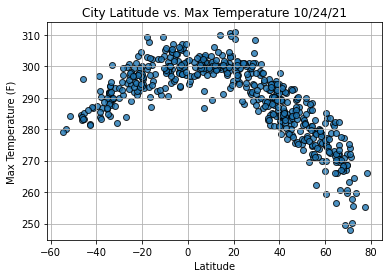

In [27]:
# Import time module
import time

# Build scatter plet for lat vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

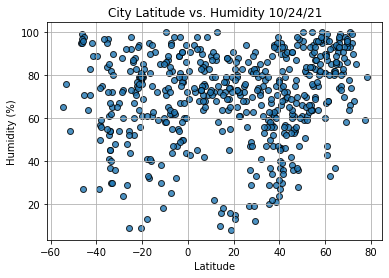

In [28]:
# Build scatter plet for lat vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

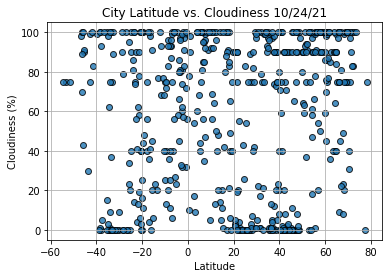

In [29]:
# Build scatter plet for lat vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

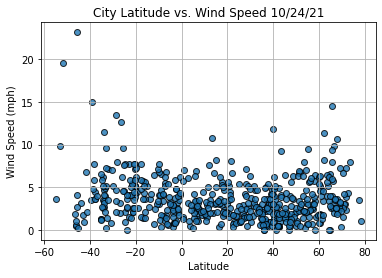

In [30]:
# Build scatter plet for lat vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the otehr graph prperties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()